In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_excel('output4.xlsx')

In [21]:
data

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df,train_columns,test_columns,target_column):#第一个参数输入数据集，第二个参数输入列号，第三个参数输入制定列名
    ## gettting all the features except survived
    age_df=df[df.columns[train_columns]]
    temp_train = age_df.loc[age_df[target_column].notnull()] 
    temp_test = age_df.loc[age_df[target_column].isnull()] 
#     temp_train = age_df.loc[age_df.是否吸烟.notnull()] ## df with age values
#     temp_test = age_df.loc[age_df.是否吸烟.isnull()] ## df without age values
    
    y = temp_train[target_column].values ## setting target variables(age) in y 
    X = temp_train[temp_train.columns[test_columns]].values
    
    rmse = []
    nestimators = []
    predict_age=[]
    for n in [1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800]:
        rfr = RandomForestRegressor(n_estimators=n,n_jobs=-1,random_state=0)
        rfr.fit(X, y)
        #由于已知数据空缺，用训练集里的数据算预测值，再用预测值与训练集已知数据比较，算模型得分
        #y_predict = rfr.predict(temp_train.iloc[:,x:z].values)
        y_predict = rfr.predict(temp_train[temp_train.columns[test_columns]].values)
        y_test=temp_train[target_column].values
        ##
        
        
        rmse=np.append(rmse,np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
        nestimators=np.append(nestimators,n)
        #predicted_age =np.append(predict_age,rfr.predict(temp_test.iloc[:,x:z].values))
        #predicted_age =np.append(predict_age,rfr.predict(temp_test.iloc[:,x:z].values))
        predict_age.append(rfr.predict(temp_test[temp_test.columns[test_columns]].values))
    
    
    index_of_minimum = np.argmin(rmse)#找到rmse数组的最小值，即最优值的索引
    predict_age=predict_age[index_of_minimum]
    predict_age1=predict_age.astype(int)
    print(index_of_minimum)
    df.loc[df[target_column].isnull(), target_column] = predict_age1
    
    
    # Creating a bar plot
    sns.set_style('whitegrid')
    plt.plot(nestimators,rmse,'ro',linestyle='dashed',linewidth=1,markersize=10)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features/RMSE")
    plt.savefig('output.png', dpi=4000, bbox_inches='tight')
    plt.show()
    return df
## Implementing the completing_age function in both train and test dataset. 


In [23]:
def write_special_values(df,special_condition,target_column,write_column):

    # 使用条件筛选出要修改的行
    rows_to_update = df.loc[df[target_column] == special_condition].index

    # 将指定列的值赋值为0
    df.loc[rows_to_update, write_column] = 0
    return df

6


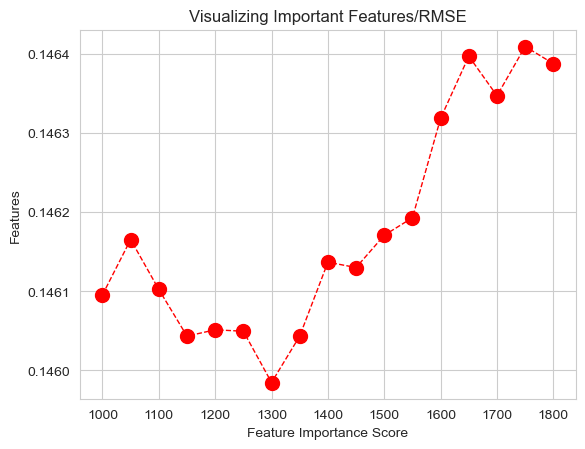

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [24]:
train_columns=[0,1,2,3,4,116,115,117]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'有没有采取措施来控制血压')

In [25]:
write_special_values(data,2,'有没有采取措施来控制血压','药物治疗来控制血压')

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [26]:
write_special_values(data,2,'有没有采取措施来控制血压','其他方法来控制血压')
write_special_values(data,2,'有没有采取措施来控制血压','控制饮食来控制血压')
write_special_values(data,2,'有没有采取措施来控制血压','适量运动来控制血压')

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

8


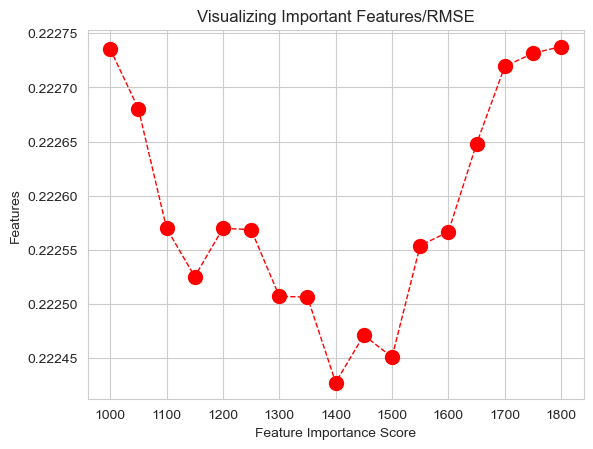

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [27]:
train_columns=[0,1,2,3,4,116,115,117,119]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'控制饮食来控制血压')

16


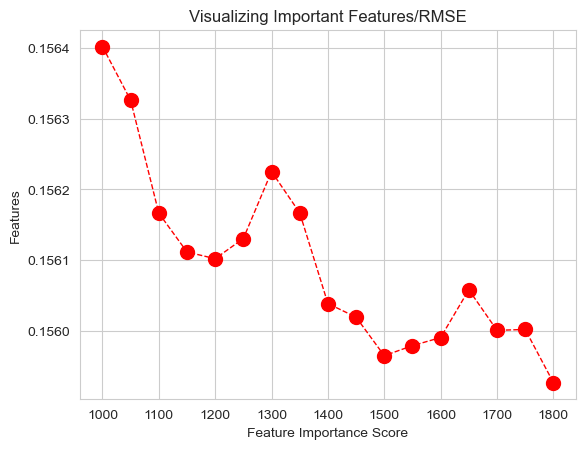

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [29]:
train_columns=[0,1,2,3,4,116,115,117,118]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'药物治疗来控制血压')

12


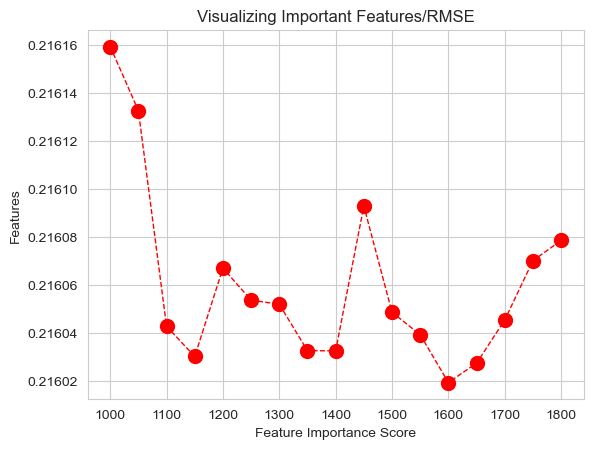

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [30]:
train_columns=[0,1,2,3,4,116,115,117,120]
test_columns=[0,1,2,3,4,5,6,7]
completing_age(data,train_columns,test_columns,'适量运动来控制血压')

5


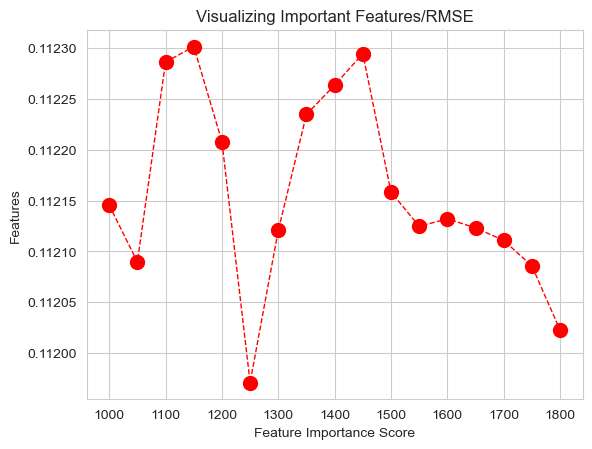

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [32]:
train_columns=[0,1,2,3,4,122,123,124]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'有没有采取措施来控制血糖')

In [33]:
write_special_values(data,2,'有没有采取措施来控制血糖','其他方法来控制血糖')
write_special_values(data,2,'有没有采取措施来控制血糖','控制饮食来控制血糖')
write_special_values(data,2,'有没有采取措施来控制血糖','适量运动来控制血糖')
write_special_values(data,2,'有没有采取措施来控制血糖','适量运动来控制血糖')

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

3


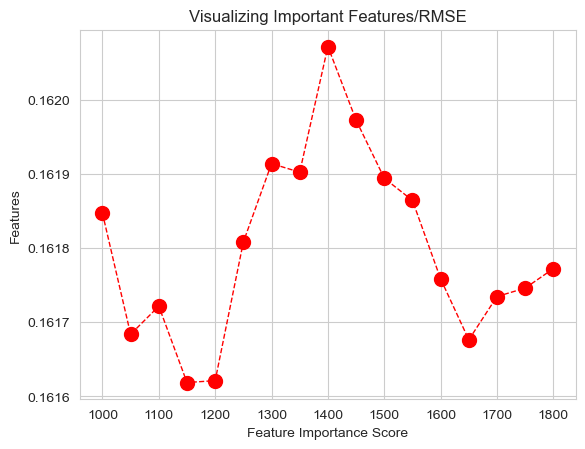

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [35]:
train_columns=[0,1,2,3,4,122,123,124,125]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'药物治疗来控制血糖')

1


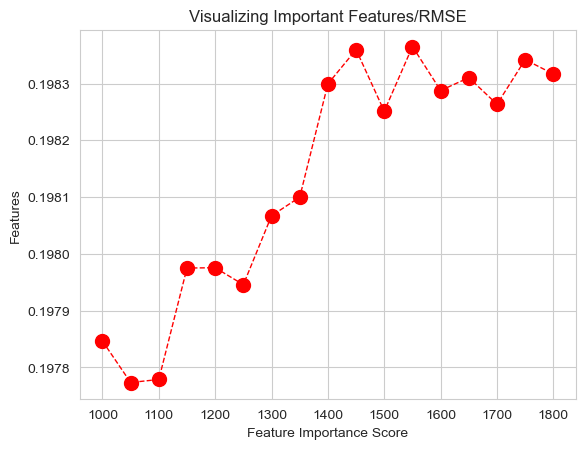

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [36]:
train_columns=[0,1,2,3,4,122,123,124,126]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'控制饮食来控制血糖')

16


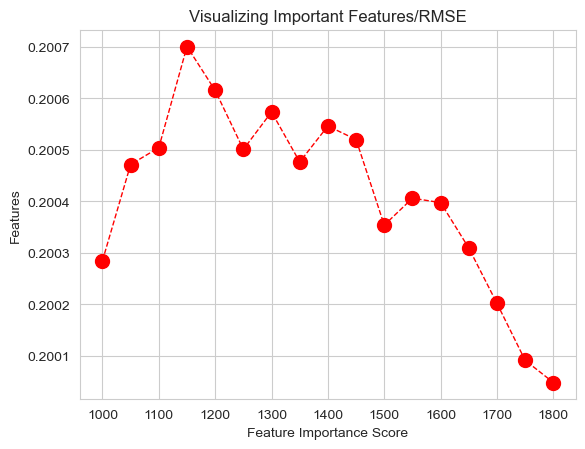

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [38]:
train_columns=[0,1,2,3,4,122,123,124,127]
test_columns=[0,1,2,3,4,5,6]
completing_age(data,train_columns,test_columns,'适量运动来控制血糖')

In [39]:
data.to_excel('output4.xlsx',index=False)

In [44]:
data=pd.read_excel('output4.xlsx')

11


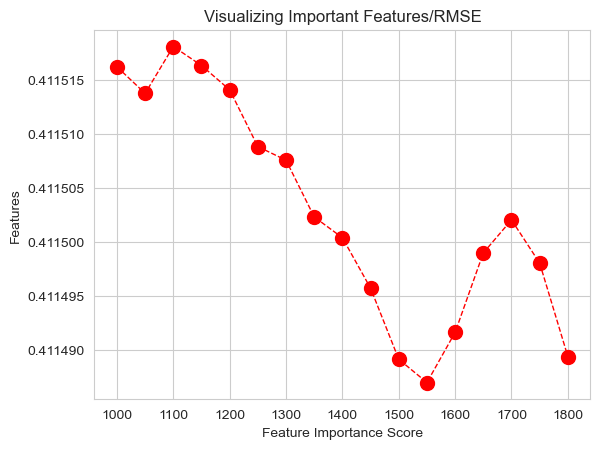

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [45]:
train_columns=[0,1,2,3,4,129]
test_columns=[0,1,2,3,4]
completing_age(data,train_columns,test_columns,'您的祖（外祖）父母、父母和兄弟姐妹中有没有人被社区或以上医院的医生诊断过患有下列慢性病')

In [46]:
write_special_values(data,1,'您的祖（外祖）父母、父母和兄弟姐妹中有没有人被社区或以上医院的医生诊断过患有下列慢性病','高血压')
write_special_values(data,1,'您的祖（外祖）父母、父母和兄弟姐妹中有没有人被社区或以上医院的医生诊断过患有下列慢性病','冠心病')
write_special_values(data,1,'您的祖（外祖）父母、父母和兄弟姐妹中有没有人被社区或以上医院的医生诊断过患有下列慢性病','脑血管疾病')
write_special_values(data,1,'您的祖（外祖）父母、父母和兄弟姐妹中有没有人被社区或以上医院的医生诊断过患有下列慢性病','糖尿病')
write_special_values(data,1,'您的祖（外祖）父母、父母和兄弟姐妹中有没有人被社区或以上医院的医生诊断过患有下列慢性病','慢性呼吸疾病')
write_special_values(data,1,'您的祖（外祖）父母、父母和兄弟姐妹中有没有人被社区或以上医院的医生诊断过患有下列慢性病','恶性肿瘤')

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

11


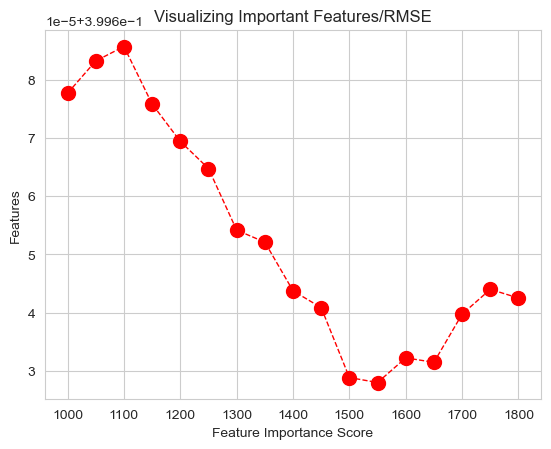

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [47]:
train_columns=[0,1,2,3,4,130]
test_columns=[0,1,2,3,4]
completing_age(data,train_columns,test_columns,'高血压')

7


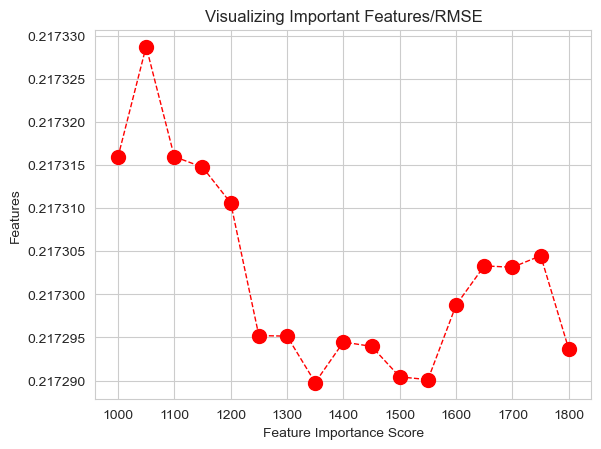

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [49]:
train_columns=[0,1,2,3,4,129,131]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'冠心病')

16


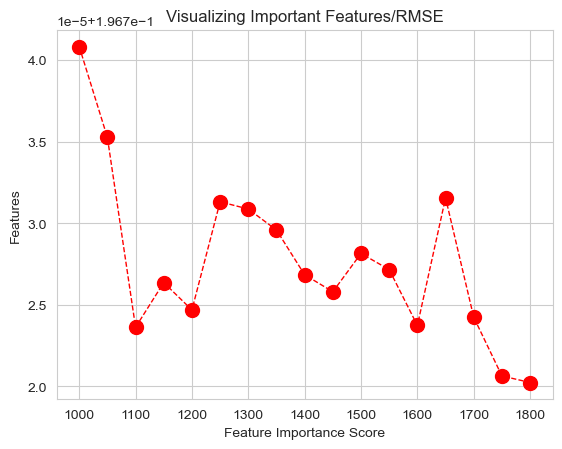

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [50]:
train_columns=[0,1,2,3,4,129,132]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'脑血管疾病')

11


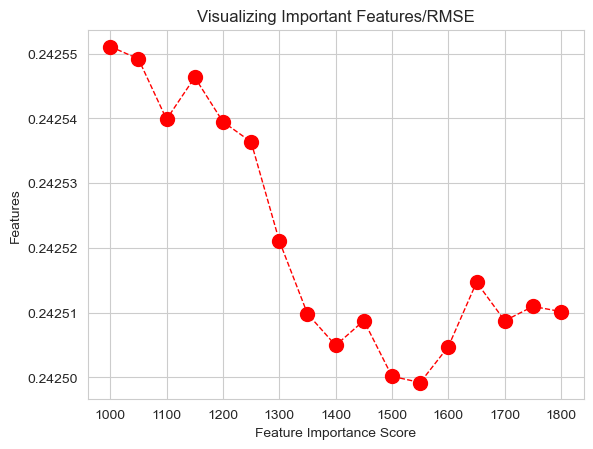

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [51]:
train_columns=[0,1,2,3,4,129,133]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'糖尿病')

12


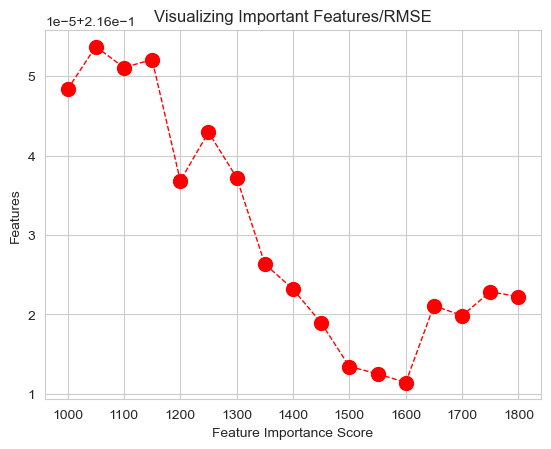

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [52]:
train_columns=[0,1,2,3,4,129,134]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'慢性呼吸疾病')

12


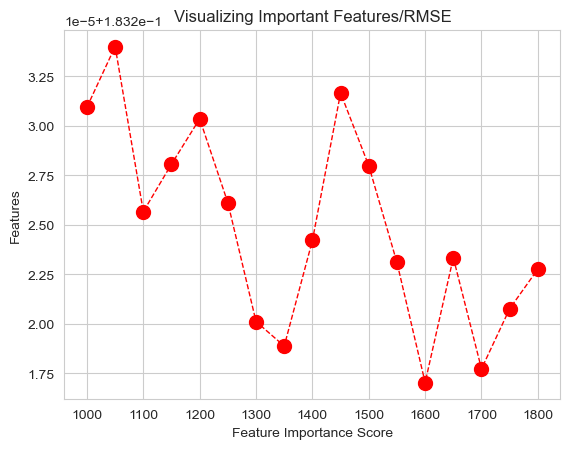

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,被动吸烟天数为,是否饮酒,饮酒年数,是否饮用高度白酒,高度白酒饮用频率,高度白酒平均每次饮用量,是否饮用低度白酒,低度白酒饮用频率,低度白酒平均每次饮用量,是否饮用啤酒,啤酒饮用频率,啤酒平均每次饮用量,是否饮用黄酒或糯米酒,黄酒或糯米酒饮用频率,黄酒或糯米酒平均每次饮用量,是否饮用葡萄酒,葡萄酒饮用频率,葡萄酒平均每次饮用量,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,中餐带餐到单位,单位食堂中餐,在餐馆或街头吃中餐,...,身高,体重,腰围,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,食用大米的频率,食用小麦面粉的频率,食用杂粮的频率,食用薯类的频率,食用油炸面食的频率,食用猪肉的频率,食用牛羊肉的频率,食用禽肉的频率,食用内脏的频率,食用水产的频率,食用鲜奶的频率,食用奶粉的频率,食用酸奶的频率,食用蛋类的频率,食用豆腐的频率,食用豆腐丝等的频率,食用豆浆的频率,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,5,0,0,2,1,2,0,5,0,0,2,...,161.5,50.5,68.0,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,1.0,0.285714,0.033333,0.033333,0.0,2.000000,0.142857,0.285714,0.000000,0.000000,0.033333,0.0,0.000000,0.285714,0.142857,0.000000,0.142857,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,3,5,0,0,0,7,0,...,166.0,48.5,60.0,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,2.0,0.066667,0.066667,0.066667,0.0,2.000000,0.000000,0.142857,0.000000,1.000000,1.000000,0.0,0.142857,0.428571,0.285714,0.000000,0.142857,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,5,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4,1,0,0,2,2,2,0,3,0,0,4,...,183.0,64.0,77.0,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,2.0,0.000000,0.000000,0.000000,0.0,2.000000,0.142857,0.142857,0.000000,0.066667,0.142857,0.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,2,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,1,3,0,7,0,0,0,...,170.4,61.5,76.5,92.0,92,62,72,4.80,4.86,1.39,2.97,0.74,412.3,2.0,0.285714,0.142857,0.066667,0.0,1.000000,0.000000,0.100000,0.100000,0.428571,0.285714,0.0,0.285714,0.100000,0.142857,0.000000,0.066667,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,7,2,2,0,0,0,7,0,...,173.6,73.0,86.8,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,1.0,0.285714,0.000000,0.000000,0.0,0.714286,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,1,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,6,0,0,0,4,4,0,7,0,0,0,...,161.8,49.0,69.0,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,2.0,0.142857,0.033333,0.100000,0.0,2.000000,0.000000,0.142857,0.000000,0.428571,0.428571,0.0,0.285714,0.285714,0.428571,0.033333,0.033333,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,3,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,6,3,0,7,0,0,0,...,158.8,63.0,92.0,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,3.0,0.142857,0.000000,0.033333,0.0,2.000000,0.000000,0.285714,0.000000,2.000000,0.285714,0.0,0.142857,0.285714,0.285714,0.066667,0.142857,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,4,2,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,7,0,0,0,5,6,0,7,0,0,0,...,174.0,60.0,81.0,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,2.0,0.000000,0.285714,0.285714,0.0,2.000000,0.066667,0.571429,0.000000,0.714286,0.285714,0.0,0.142857,0.714286,0.571429,0.000000,0.033333,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.28

In [53]:
train_columns=[0,1,2,3,4,129,135]
test_columns=[0,1,2,3,4,5]
completing_age(data,train_columns,test_columns,'恶性肿瘤')

In [54]:
data.to_excel("output4.xlsx",index=False)